In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.callbacks import ModelCheckpoint


#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
#from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
#from sklearn.metrics import precision_recall_curve, average_precision_score


In [2]:
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst

In [3]:
file_path = 'data/churn.csv'
data_dict = gen_bulk_data(file_path)
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

In [4]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)

In [5]:
#x_train.drop(columns=['index'], inplace=True)
#x_test.drop(columns=['index'], inplace=True)
x_train

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,34,94,415,1855,0,0,0,190.4,91,32.37,92.0,107,7.82,224.8,108,10.12,13.6,17,3.67,2
1,47,124,408,2883,0,0,0,282.8,108,48.08,246.3,89,20.94,256.4,96,11.54,10.3,1,2.78,3
2,30,148,408,316,0,0,0,17.6,121,2.99,161.7,125,13.74,203.1,82,9.14,10.6,6,2.86,1
3,12,79,415,905,0,1,17,167.9,114,28.54,243.7,93,20.71,211.9,114,9.54,9.1,2,2.46,1
4,6,15,415,3641,0,0,0,185.1,103,31.47,193.8,148,16.47,305.2,79,13.73,13.2,6,3.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,32,137,408,1593,1,0,0,312.4,110,53.11,231.1,73,19.64,120.1,78,5.40,10.6,2,2.86,1
3496,28,101,415,1934,0,1,36,123.7,125,21.03,172.6,106,14.67,280.5,127,12.62,8.8,4,2.38,1
3497,8,94,415,3006,0,1,38,220.0,102,37.40,180.3,119,15.33,136.2,90,6.13,10.3,2,2.78,1
3498,41,128,415,1390,0,0,0,247.3,91,42.04,182.7,60,15.53,143.2,112,6.44,14.7,2,3.97,3


In [6]:
from keras.utils import to_categorical 
import numpy as np

y_train_cat = to_categorical(y_train)

type(y_train_cat)
print(y_train_cat.shape)
print(x_train.shape)



#for i in range(len(y_train_cat)):
#    print(y_train_cat[i])


(3500, 2)
(3500, 20)


In [7]:
input_shape = len(x_train.columns)


model = tf.keras.models.Sequential() # model instance

# accuracy: 0.8890
#model.add(tf.keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.5))
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.5))

# accuracy: 0.915
#model.add(tf.keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
#model.add(tf.keras.layers.Dense(8, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))

# accuracy: xx
model.add(tf.keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
#model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # output layer with 2 classes to clasify
model.summary() # architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss='binary_crossentropy',
    #loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.0005),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [9]:
epo = 50

CB_checkpoint = ModelCheckpoint(monitor='val_true_positives', filepath='model.hdf5', save_best_only=True, verbose=1)


history = model.fit(x_train, y_train, epochs=epo, validation_split=0.2, callbacks=[CB_checkpoint], verbose=0)


Epoch 00001: val_true_positives improved from inf to 26.00000, saving model to model.hdf5

Epoch 00002: val_true_positives improved from 26.00000 to 6.00000, saving model to model.hdf5

Epoch 00003: val_true_positives did not improve from 6.00000

Epoch 00004: val_true_positives improved from 6.00000 to 2.00000, saving model to model.hdf5

Epoch 00005: val_true_positives did not improve from 2.00000

Epoch 00006: val_true_positives did not improve from 2.00000

Epoch 00007: val_true_positives did not improve from 2.00000

Epoch 00008: val_true_positives did not improve from 2.00000

Epoch 00009: val_true_positives did not improve from 2.00000

Epoch 00010: val_true_positives did not improve from 2.00000

Epoch 00011: val_true_positives did not improve from 2.00000

Epoch 00012: val_true_positives did not improve from 2.00000

Epoch 00013: val_true_positives did not improve from 2.00000

Epoch 00014: val_true_positives did not improve from 2.00000

Epoch 00015: val_true_positives did n

In [10]:
#model.load_weights('model.hdf5')
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.8640 - precision: 0.7500 - recall: 0.0566 - true_positives: 6.0000        


[0.7095096111297607, 0.8640000224113464, 0.75, 0.056603774428367615, 6.0]

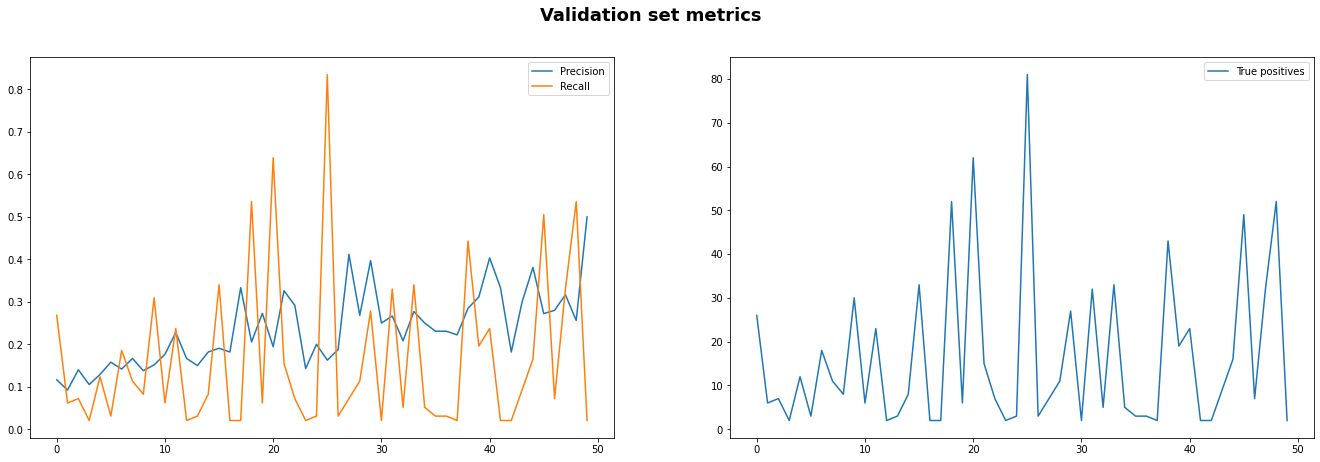

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23, 7))

#plt.plot(history.history['accuracy'], label='train set accuracy')
#plt.plot(history.history['val_accuracy'], label='validation set accuracy')
ax1.plot(history.history['val_precision'], label='Precision')
ax1.plot(history.history['val_recall'], label='Recall')

ax2.plot(history.history['val_true_positives'], label='True positives')

plt.suptitle('Validation set metrics', fontsize=18, fontweight='bold')
#plt.xticks(range(epo))
ax1.legend()
ax2.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred

array([[3.26113513e-04],
       [9.36180659e-05],
       [1.44400327e-02],
       [2.64669284e-02],
       [7.39548414e-05],
       [8.96035577e-04],
       [3.84166315e-02],
       [8.95729638e-04],
       [1.24155846e-03],
       [2.56699082e-02],
       [2.07311008e-03],
       [8.79887899e-04],
       [1.79652527e-01],
       [4.65862872e-03],
       [7.74586515e-05],
       [1.40140086e-01],
       [6.81176223e-03],
       [2.56153825e-03],
       [2.52755068e-04],
       [1.68998857e-04],
       [1.95790012e-03],
       [4.46400000e-03],
       [2.64855043e-04],
       [1.70231870e-04],
       [8.85943300e-05],
       [5.58412052e-04],
       [1.35708284e-02],
       [1.97412749e-03],
       [2.84372456e-02],
       [1.59042934e-03],
       [4.12096677e-04],
       [5.14894273e-05],
       [8.72945064e-04],
       [1.33317517e-04],
       [5.02495289e-01],
       [1.44236749e-02],
       [1.04712304e-02],
       [5.08725294e-04],
       [1.09345812e-04],
       [1.58533044e-02],


In [13]:
import numpy as np

threshold = 0.5
y_pred_thres = np.where(y_pred<=threshold, 0, 1)



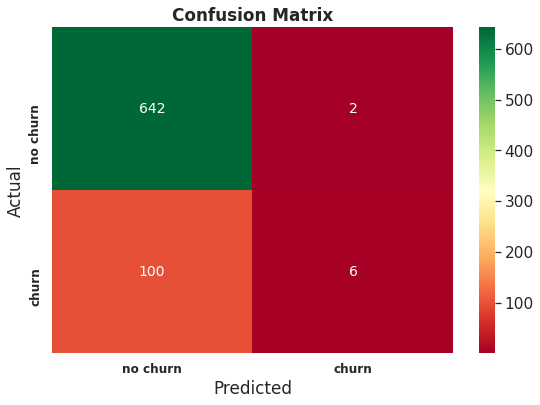

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = confusion_matrix(y_test, y_pred_thres)
df_cm = pd.DataFrame(data, columns=['no churn', 'churn'], index=['no churn', 'churn'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, cmap='RdYlGn', annot=True, annot_kws={"size": 14}, fmt='d')
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

In [ ]:
epochs = 20



model = Sequential()
model.add(Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(input_shape,), activation='relu' ))
model.add(Dropout(rate=0.4))
model.add(Dense(8,kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(1, activation='sigmoid'))
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay( 0.001,
      decay_steps=(x_train.shape[0]/32)*5,
      decay_rate=1,
      staircase=False)

#This time decay means for every 5 epochs the learning rate will be half of 0.001 value
def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=70,restore_best_weights=True)]


model.compile(loss = "binary_crossentropy", 
                  optimizer = get_optimizer(), 
                  metrics=['accuracy'])
    

    
    
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, callbacks=get_callbacks())#, verbose=0)

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

Epoch 1/20
110/110 [==============================] - 0s 3ms/step - loss: 28.5632 - accuracy: 0.8000 - val_loss: 0.6970 - val_accuracy: 0.8587
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 3.3514 - accuracy: 0.8486 - val_loss: 0.6647 - val_accuracy: 0.8587
Epoch 3/20
110/110 [==============================] - 0s 3ms/step - loss: 1.9616 - accuracy: 0.8560 - val_loss: 0.6400 - val_accuracy: 0.8587
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 1.2584 - accuracy: 0.8543 - val_loss: 0.6208 - val_accuracy: 0.8587
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 0.9166 - accuracy: 0.8560 - val_loss: 0.6056 - val_accuracy: 0.8587
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 1.1320 - accuracy: 0.8574 - val_loss: 0.5928 - val_accuracy: 0.8587
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 1.0287 - accuracy: 0.8569 - val_loss: 0.5819 - val_accuracy: 0.8587
Epoch

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_test)
threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)


normalize='true'

if normalize == 'true':
    format = '.5f'
else:
    format = 'd'
    
# calculate confusion matrix
data = confusion_matrix(y_test, y_pred, normalize=normalize)
df_cm = pd.DataFrame(data, columns=['no churn', 'churn'], index=['no churn', 'churn'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# print dataframe
display(df_cm)

# plot
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, cmap='RdYlGn', annot=True, annot_kws={"size": 14}, fmt=format)
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

print("\nClassification report:\n", classification_report(y_test, y_pred))